In [1]:
import numpy as np
import pandas as pd 

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

features = [
    'danceability',
    'energy',
    #'key',
    'loudness',
    #'mode',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    #'duration_ms',
    #'time_signature'
]

In [2]:
#Pandas reads the dataframe and the numpy array from the directory or path
df = pd.read_csv ('/home/asmaosman/Downloads/Features files/data_with_latent.csv',  index_col = 0)  #index_col tells pandas to read the first column as an index
data = np.load('/home/asmaosman/Downloads/Features files/training_data.npy')

In [3]:
res_kpca = df[['x_kpca_rbf','y_kpca_rbf']].to_numpy()

In [4]:
clusterer =KMeans(n_clusters=4)
clusters =clusterer.fit_predict(res_kpca)

In [5]:
clusters[:5]

array([0, 2, 0, 0, 3], dtype=int32)

In [6]:
markers = list('*hH+xXDd|.,ov^<>12348spP')

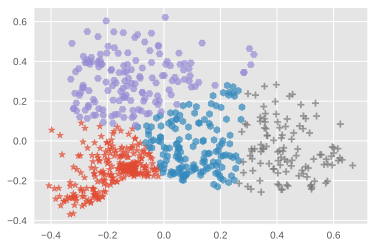

In [7]:
for cluster in np.unique(clusters):
    cluster_data = res_kpca[clusters==cluster]
    plt.scatter (
    cluster_data[:,0],
    cluster_data[:,1],
        alpha=0.7,
        marker=markers[cluster]
    )

/home/asmaosman/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


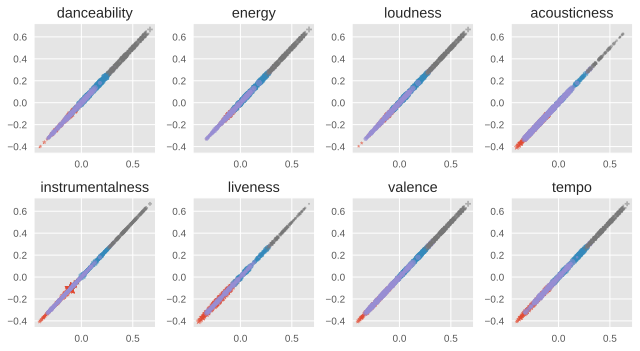

In [8]:
fig, axes = plt.subplots(2,4, figsize=(9,5))

for feature, ax in zip (features, axes.ravel()):
    cmap ='inferno'
    for cluster in np.unique(clusters):
        cluster_data = res_kpca[clusters==cluster]
        sizes= 20+20*data[:, features.index(feature)][clusters==cluster]
        ax.scatter(
            cluster_data[:,0],
            cluster_data[:,0],
            s=sizes,
            alpha=0.5,
            cmap=cmap,
            marker=markers[cluster]
        )
        
    ax.set_title(feature)
plt.tight_layout()

In [9]:
df['cluster_kpca_rbf'] = clusters
df.to_csv('/home/asmaosman/Downloads/Features files/data_with_clusters.csv')

In [10]:
df.head()

,track_id,track_title,artist_name,popularity,release_date,danceability,energy,key,loudness,mode,...,tempo,duration_ms,time_signature,x_kpca_poly,y_kpca_poly,x_kpca_rbf,y_kpca_rbf,x_kpca_cosine,y_kpca_cosine,cluster_kpca_rbf
0,1IvCDL81YXIL0suRMXTQRn,Alaman,Alblabel,1,2000-10-05,0.317,0.386,9,-13.066,1,...,100.796,352271,4,2.003674,0.012191,-0.119203,-0.120788,0.596282,0.147119,0
1,10uGAGbXtLtWvJSF8zw1HY,Aboi,Insaf Fathi,9,2021-04-30,0.527,0.444,11,-13.708,1,...,124.681,459023,4,0.051277,-0.557350,-0.320253,0.161887,0.936833,0.038600,2
2,2z0eJa29bsAsbCnAmOoIDB,Aboya wain,Ahmed Amin,6,2019-05-06,0.494,0.170,4,-20.979,0,...,155.024,184258,1,0.416699,-1.307391,-0.132858,-0.148589,0.652190,-0.166454,0
3,0ZvvrRfqA2i6VWtpnVf63Y,Abu aaj akhoi,Alblabel,0,2000-10-05,0.322,0.630,10,-9.473,0,...,102.394,353687,3,6.117973,2.667085,-0.103690,-0.133152,0.226418,0.192554,0
4,0O1hL1XywDVyu9HL6mx0gF,Agacheh,Squad التالتة,12,2020-01-04,0.737,0.704,4,-7.925,0,...,139.985,154299,4,-0.530913,0.581683,0.552193,-0.069290,-0.808331,-0.260222,3


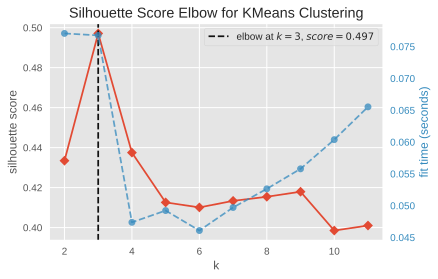

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
#Elbow method: what is the optimal k?
Clusterer =KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2,12), metric='silhouette')

visualizer.fit(res_kpca)
visualizer.show()

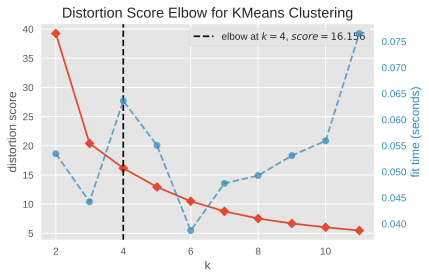

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
Clusterer =KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2,12), metric='distortion')

visualizer.fit(res_kpca)
visualizer.show()